### 词云

“词云”是对网络文本中出现频率较高的关键词予以视觉上的突出，形成“关键词云层”或“关键词渲染”，从而过滤大量无意义信息，突出文章或网页的主旨。

**安装**：`pip install -i https://pypi.tuna.tsinghua.edu.cn/simple wordcloud`

**调用**：`from wordcloud import WordCloud`

**绘制词云：**

In [41]:
## 读取文本
with open('sample.txt', encoding='utf-8') as f:
    data = f.read()
    
data

'中金公司：预计A股银行指数未来3-5个季度的上涨空间为50%：中金公司张帅帅等人12月4日发布研报指出，目前银行处于未来5个季度业绩V型反转的起点，处于风险溢价因素反转的起点，处于估值仓位反转的起点。宏观经济复苏趋势明确，流动性环境亦有利于银行业绩表现，向前看预计A股和H股银行指数未来3-5个季度的上涨空间分别为50%和60%\n'

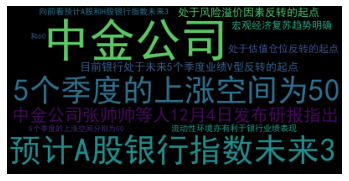

In [42]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

my_wordcloud = WordCloud(font_path="/Fonts/simhei.ttf").generate(data) # 生成词云

plt.imshow(my_wordcloud) #绘制词云图片
plt.axis("off") #不显示坐标轴
plt.show() #显示图片

my_wordcloud.to_file("词云图.png") # 保存词云图片至本地

#### wordcloud库简介

[官方文档](http://amueller.github.io/word_cloud/)

类：`wordcloud.WordCloud()`，用来生成和绘制词云对象

**实现流程：**
- 引入第三方库
- 获取要生成词云的文本
- 生成text对应的词云对象
- 输出词云图像文件

**wordcloud如何将文本转化为词云？**
- 文本分词：默认以空格分隔各词
- 词频统计：统计单词出现的次数，并初步过滤
>`stopwords = set('use')`: 设置要去除的停用词。以字符串或集合作为接收参数。如不设置将使用内置默认的停用词词库。
- 字号配置：根据词频进行字号配置
- 云图布局：配置云图的颜色、字体、尺寸等

**WordCloud对象的常用参数**

|参数|描述|
|--|--|
|width/height|指定词云对象生成图片的宽度、高度，WordCloud(width=400, height=200)|
|background_color|指定词云图片的背景颜色，WordCloud(background_color='black')|
|stopwords|指定词云的停用词列表，WordCloud(stopwords = STOPWORDS.add('use')|
|mask|指定词云图片的形状，默认为矩形，一般结合imread函数使用|
|font_path|指定字体文件的路径，默认为None，WordCloud(font_path="/Fonts/simhei.ttf")|

**Exercise：**

    请大家自行练习并掌握使用wordcloud绘制词云图的方法。

#### 提升词云绘制效果

wordcloud库会自动对文本进行分词及词频统计，但它的效果通常不尽如人意，因此我们需要对文本进行预处理。

文本分词：将文本分隔成独立的字词便于后续的处理。

中文分词工具：jieba、pkuseg、thulac、pynlpir……

词频统计的应用场景：
- 搜索引擎对文档建模
- 热词分析、主题分析、舆情分析、风控等等

**使用jieba中文分词后绘制词云：**

In [43]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import jieba

## 读取文本
with open('sample.txt', encoding='utf-8') as f:
    data = f.read()

## 使用jieba进行中文分词
words_ls = jieba.cut(data, cut_all=True)
words_split = " ".join(words_ls)

words_split

'中金 中金公司 公司 ： 预计 A股 银行 指数 未来 3 - 5 个 季度 的 上涨 空间 为 50 % ： 中金 中金公司 公司 张 帅 帅 等 人 12 月 4 日 发布 研 报 指出 ， 目前 银行 处于 未来 5 个 季度 业绩 V 型 反转 的 起点 ， 处于 风险 溢价 因素 反转 的 起点 ， 处于 估值 仓位 反转 的 起点 。 宏观 宏观经济 经济 复苏 趋势 明确 ， 流动 流动性 环境 亦 有利 有利于 利于 银行 银行业 行业 业绩 表现 ， 向前 看 预计 A股 和 H股 银行 指数 未来 3 - 5 个 季度 的 上涨 空间 分别 为 50 % 和 60 %  \n '

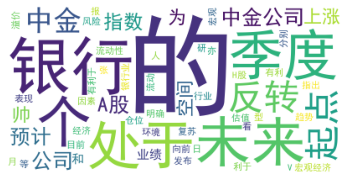

In [44]:
## 绘制词云图

wc =  WordCloud(font_path="simhei.ttf", background_color='white')
my_wordcloud = wc.generate(words_split)

plt.imshow(my_wordcloud)
plt.axis("off")
plt.show()

**去除停用词**

停用词是指在信息检索中，为提高搜索效率，处理文本数据之前会自动过滤掉某些字词，这些字词被称作停用词。例如：  
英：'this', 'is', 'at', 'on'...  
中：的、地、了、吗……

这些词没有什么实际含义，但使用频率很高，降低了搜索效率，所以通常会将这些词从文本中移除。

**去除一些停用词后绘制词云：**

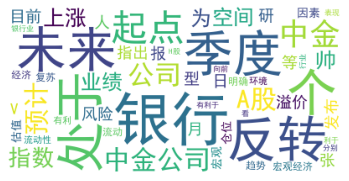

In [45]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import jieba

## 读取文本
with open('sample.txt', encoding='utf-8') as f:
    data = f.read()

## 文本初步预处理
for ch in "。，：；{|}（）()+-*&……%￥#@！~·`、【】[];:?？《》<>,.在从的得地亦和":
    data = data.replace(ch, ' ')

## 使用jieba进行中文分词
words_ls = jieba.cut(data, cut_all=True)
words_split = " ".join(words_ls)

## 绘制词云图

wc =  WordCloud(font_path="simhei.ttf", background_color='white')
my_wordcloud = wc.generate(words_split)

plt.imshow(my_wordcloud)
plt.axis("off")
plt.show()

**根据关键词绘制词云：**

在使用WordCloud.generate方法绘制词云时，输入对象是文本字符串。我们也可以使用fit_words方法绘制词云，该方法允许输入包含词及词重要性的字典。

In [62]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import jieba
import numpy as np
import jieba.analyse as analyse

## 读取本地的文本文件
with open('sample.txt', encoding='utf-8') as f:
    data = f.read()

## 使用jieba提取关键词
keywords = analyse.textrank(data, topK=20, withWeight=True)

keywords

[('银行', 1.0),
 ('起点', 0.9211177320895378),
 ('反转', 0.8457929247707175),
 ('处于', 0.8064532494214263),
 ('季度', 0.4890150669074504),
 ('预计', 0.47081511376522156),
 ('A股', 0.4610380359296514),
 ('业绩', 0.4055265557629164),
 ('指数', 0.401942062149008),
 ('流动性', 0.3611504689191467),
 ('环境', 0.35778203857481455),
 ('有利于', 0.3575445623524746),
 ('趋势', 0.3553876099325149),
 ('溢价', 0.3547038329107079),
 ('指出', 0.33511502234390944),
 ('空间', 0.3122841771430167),
 ('上涨', 0.3098368073036951),
 ('风险', 0.30498157406564275),
 ('因素', 0.30180003648249787),
 ('估值', 0.29671379704152073)]

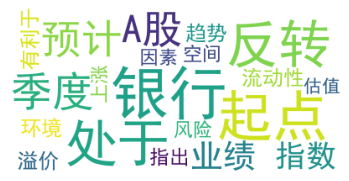

In [63]:
## 绘制词云图

wc =  WordCloud(font_path="simhei.ttf", background_color='white')
my_wordcloud = wc.fit_words(dict(keywords))

plt.imshow(my_wordcloud)
plt.axis("off")
plt.show()